In [23]:
#must run on colab or have own copy of MNIST data
import pandas as pd
df = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
df_test = pd.read_csv('sample_data/mnist_test.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]

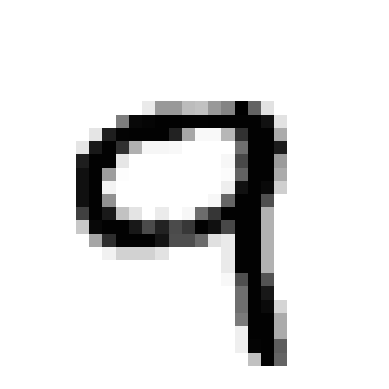

9


In [25]:
#not part  of the exercise, but if you wanted to view the data, here is code to view an individual sample data
import numpy as np
#get random index from 0 to num of rows in X
random_index = np.random.randint(0, X.shape[0])
#get the row with that index
random_row = X.iloc[random_index, :]
#make into a numpy array
np_random_row = np.array(random_row)
#reshape from 1x784 to 28x28
random_image = np_random_row.reshape(28, 28)
#display the reshaped row, now 28x28
import matplotlib.pyplot as plt
plt.imshow(random_image, cmap="Greys")
plt.axis('off')
plt.show()
print(y[random_index])

In [26]:
#now back to our regularly scheduled program
from keras.utils import to_categorical
y = to_categorical(y, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [27]:
# standardize X
X /= 255
X_test /= 255
# convert X to numpy array
X = np.array(X)
X_test = np.array(X_test)
# reshape X to (rows, 28, 28, 1)
X = X.reshape(X.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [28]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
model = Sequential()

In [29]:
model.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(2))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

print(model.summary())
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=20)
model.evaluate(X_test, y_test)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,954 (34.98 KB)

 Trainable params: 8,954 (34.98 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7578 - loss: 0.8362
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9576 - loss: 0.1369
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9683 - loss: 0.1022
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9786 - loss: 0.0738
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9805 - loss: 0.0658
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9827 - loss: 0.0556
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9836 - loss: 0.0480
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9883 - loss: 0.0383
Epoch 9/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9867 - loss: 0.0355
Epoch 10/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9906 - loss: 0.0292
Epoch 11/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9917 - loss: 0.0263
Epoch 12/20
625/625 ━━━━━━━━━━━━━

[0.06290346384048462, 0.9843999743461609]